In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# load the dataset
url = "https://raw.githubusercontent.com/woosace/CSV-to-Link/main/a24_data_cleaned%202.csv"
A24data = pd.read_csv(url)

# print the first few rows
A24data.head()

,Unnamed: 0,title,Directed_by,Written_by,Produced_by,Starring,Cinematography,Edited_by,Music_by,Production_companies,...,Budget,Box_office,Release_dates,imdb,imdb_edited,imdb_new,metascore,rotten_tomatoes,rotten_tomatoes_new,rotten_tomato
0,117.0,Elizabeth: A Portrait in Parts,Roger Michell,NaN,Kevin Loader,NaN,NaN,Joanna Crickmay,George Fenton,"['Ingenious Media', 'Free Range Films']",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,135.0,Sharper,Benjamin Caron,NaN,"['Bart Freundlich', 'Brian Gatewood', 'Alessan...","['Julianne Moore', 'Sebastian Stan', 'Justice ...",Charlotte Bruus Christensen,Yan Miles,Clint Mansell,"['Apple Original Films', 'Picturestart', 'IAC ...",...,NaN,NaN,2023.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
2,136.0,Beau Is Afraid,Ari Aster,Ari Aster,"['Ari Aster', 'Lars Knudsen']","['Joaquin Phoenix', 'Nathan Lane', 'Patti LuPo...",Pawel Pogorzelski,Lucian Johnston,Bobby Krlic,"['A24', 'Square Peg']",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
3,137.0,All Dirt Roads Taste of Salt,Raven Jackson,Raven Jackson,"['Maria Altamirano', 'Barry Jenkins', 'Adele R...","['Charleen McClure', 'Moses Ingram', 'Sheila A...",Jomo Fray,Lee Chatametikool,"['Sasha Gordon', 'Victor Magro']","['A24', 'PASTEL']",...,NaN,NaN,2023.0,NaN,0.0,NaN,87.0,NaN,0.0,NaN
4,138.0,Earth Mama,Savanah Leaf,Savanah Leaf,"['Cody Ryder', 'Shirley O’Connor', 'Medb Riord...","['Tia Nomore', 'Erika Alexander', 'Doechii', '...",Jody Lee Lipes,George Cragg,Kelsey Lu,"['A24', 'Film4 Productions', 'Academy Films', ...",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN


In [67]:
# descriptive statistics on imdb data (audience scores)
A24data['imdb_new'].describe()

count    142.000000
mean      65.943662
std        8.326472
min       36.000000
25%       61.250000
50%       66.000000
75%       72.000000
max       84.000000
Name: imdb_new, dtype: float64

In [68]:
# descriptive statistics on metascore data (critic scores)
A24data['metascore'].describe()

count    136.000000
mean      68.647059
std       16.925777
min        9.000000
25%       60.750000
50%       72.500000
75%       81.000000
max       99.000000
Name: metascore, dtype: float64

In [69]:
# descriptive statistics on rotten tomato data (critic scores)
A24data['rotten_tomato'].describe()

count    132.000000
mean      75.356061
std       22.173890
min       11.000000
25%       66.750000
50%       84.000000
75%       91.000000
max       99.000000
Name: rotten_tomato, dtype: float64

In [108]:
# little to no correlation between budget and box office revenue
Budget, Box_office = "Budget", "Box_office"
corr = A24data[Budget].corr(A24data[Box_office])
print("Correlation between ", Budget, " and ", Box_office, "is: ", round(corr, 2))

Correlation between  Budget  and  Box_office is:  0.06


Correlation between metascore and rotten_tomato is: 0.91


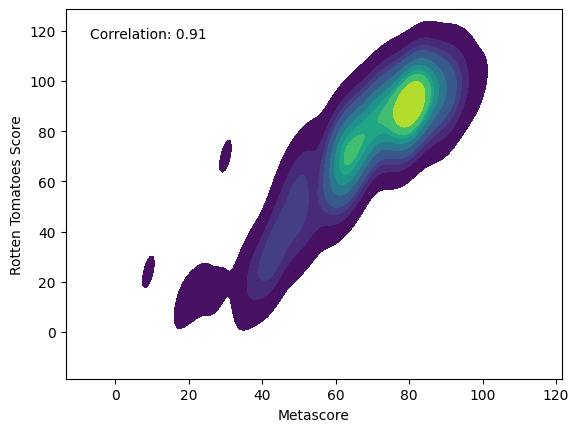

In [126]:
# high correlation between critic scores
metascore = "metascore"
rotten_tomato = "rotten_tomato"

corr = A24data[metascore].corr(A24data[rotten_tomato])
print("Correlation between", metascore, "and", rotten_tomato, "is:", round(corr, 2))

ax = sns.kdeplot(data=A24data, x=metascore, y=rotten_tomato, cmap='viridis', fill=True)

# Set axis labels
ax.set_xlabel('Metascore')
ax.set_ylabel('Rotten Tomatoes Score')

correlation_label = f'Correlation: {round(corr, 2)}'
ax.text(0.05, 0.95, correlation_label, transform=ax.transAxes, ha='left', va='top')

plt.show()

Correlation between imdb_new and metascore is: 0.64


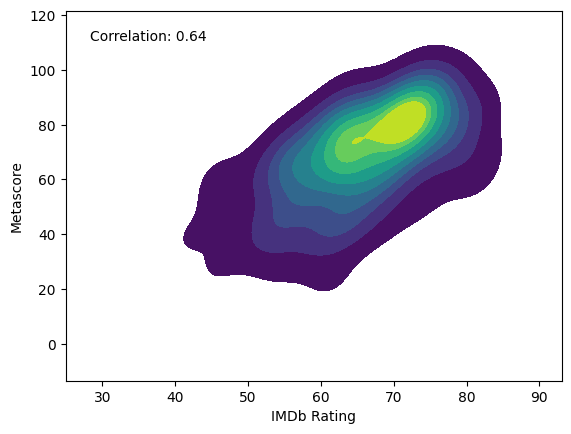

In [127]:
# moderate positive correlation between audience score & metascore scores
imdb_new = "imdb_new"
metascore = "metascore"

corr = A24data[imdb_new].corr(A24data[metascore])
print("Correlation between", imdb_new, "and", metascore, "is:", round(corr, 2))

ax = sns.kdeplot(data=A24data, x=imdb_new, y=metascore, cmap='viridis', fill=True)

# Set axis labels
ax.set_xlabel('IMDb Rating')
ax.set_ylabel('Metascore')

correlation_label = f'Correlation: {round(corr, 2)}'
ax.text(0.05, 0.95, correlation_label, transform=ax.transAxes, ha='left', va='top')

plt.show()

Correlation between imdb_new and rotten_tomato is: 0.65


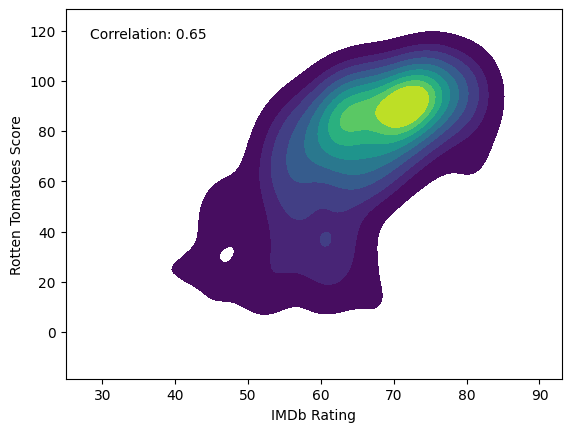

In [128]:
# moderate positive correlation between audience score & rotten tomato scores
imdb_new = "imdb_new"
rotten_tomato = "rotten_tomato"

corr = A24data[imdb_new].corr(A24data[rotten_tomato])
print("Correlation between", imdb_new, "and", rotten_tomato, "is:", round(corr, 2))

ax = sns.kdeplot(data=A24data, x=imdb_new, y=rotten_tomato, cmap='viridis', fill=True)

# Set axis labels
ax.set_xlabel('IMDb Rating')
ax.set_ylabel('Rotten Tomatoes Score')

correlation_label = f'Correlation: {round(corr, 2)}'
ax.text(0.05, 0.95, correlation_label, transform=ax.transAxes, ha='left', va='top')

plt.show()

In [142]:
# Calculate average scores per director
imdb_avg_scores = A24data.groupby('Directed_by')['imdb_new'].mean().dropna().sort_values(ascending=False)
metascore_avg_scores = A24data.groupby('Directed_by')['metascore'].mean().dropna().sort_values(ascending=False)
rotten_tomato_avg_scores = A24data.groupby('Directed_by')['rotten_tomato'].mean().dropna().sort_values(ascending=False)

# Get top 5 and bottom 5 directors based on average scores
top_5_imdb = set(imdb_avg_scores.head(5).index)
bottom_5_imdb = set(imdb_avg_scores.tail(5).index)

top_5_metascore = set(metascore_avg_scores.head(5).index)
bottom_5_metascore = set(metascore_avg_scores.tail(5).index)

top_5_rotten_tomato = set(rotten_tomato_avg_scores.head(5).index)
bottom_5_rotten_tomato = set(rotten_tomato_avg_scores.tail(5).index)

# Find matches between the top 5 and bottom 5 directors
matches = top_5_imdb.intersection(top_5_metascore, top_5_rotten_tomato).union(bottom_5_imdb.intersection(bottom_5_metascore, bottom_5_rotten_tomato))

print("Matching directors between the top 5 and bottom 5 average scores:")
print(matches)

Matching directors between the top 5 and bottom 5 average scores:
{'Roman Coppola'}


In [143]:
# Top 5 & Bottom 5 average metascores scores per director
A24data.groupby('Directed_by')['imdb_new'].mean().dropna().sort_values(ascending=False)

Directed_by
Stephen McCallum                       82.0
Lenny Abrahamson                       81.0
Darren Aronofsky                       81.0
['Daniel Kwan', 'Daniel Scheinert']    80.0
Dean Fleischer Camp                    79.0
                                       ... 
John Lee                               47.0
Roman Coppola                          46.0
Austin Vesely                          46.0
['Kate Mulleavy', 'Laura Mulleavy']    42.0
Tommy Wiseau                           36.0
Name: imdb_new, Length: 120, dtype: float64

In [72]:
# Top 5 & Bottom 5 average metascores scores per director
A24data.groupby('Directed_by')['metascore'].mean().dropna().sort_values(ascending=False)

Directed_by
Barry Jenkins                   99.0
Charlotte Wells                 95.0
Greta Gerwig                    93.0
Bo Burnham                      89.0
Lulu Wang                       89.0
                                ... 
['Andrew Lau', 'Andrew Loo']    36.0
Roman Coppola                   28.0
Gus Van Sant                    23.0
Shawn Christensen               18.0
Tommy Wiseau                     9.0
Name: metascore, Length: 115, dtype: float64

In [74]:
# Top 5 & Bottom 5 average rotten tomato scores per director
A24data.groupby('Directed_by')['rotten_tomato'].mean().dropna().sort_values(ascending=False)

Directed_by
Dean Fleischer Camp             99.0
Greta Gerwig                    99.0
Bo Burnham                      99.0
Barry Jenkins                   98.0
Lee Isaac Chung                 98.0
                                ... 
Gilles Paquet-Brenner           23.0
Gus Van Sant                    17.0
Roman Coppola                   16.0
['Andrew Lau', 'Andrew Loo']    15.0
Shawn Christensen               11.0
Name: rotten_tomato, Length: 112, dtype: float64

<Axes: xlabel='Running_time', ylabel='title'>

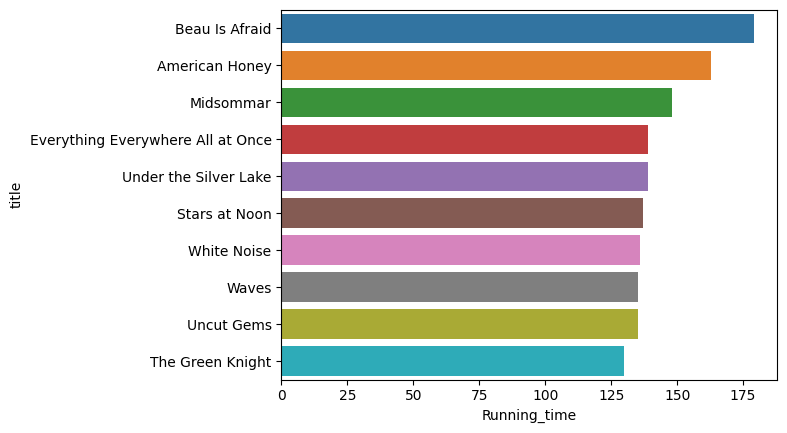

In [75]:
# top 10 longest running time
Top10_largelen = A24data.nlargest(10, 'Running_time')[['title', 'Directed_by', 'Running_time']]\
.set_index('title')

Top10_largelen

sns.barplot(x='Running_time', y=Top10_largelen.index, data=Top10_largelen)

<Axes: xlabel='Running_time', ylabel='title'>

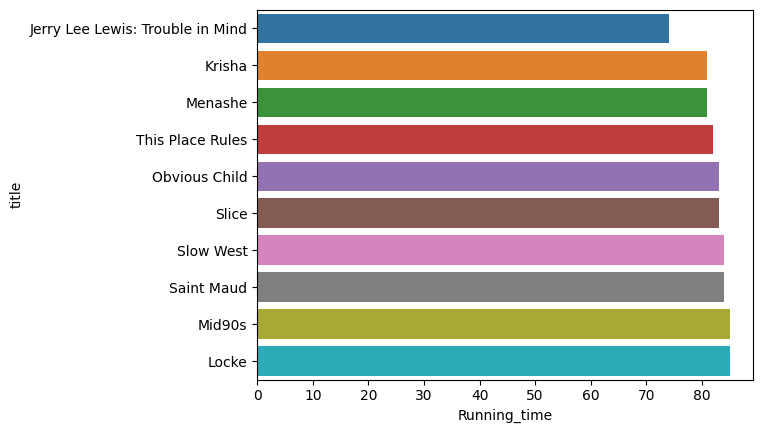

In [76]:
# top 10 smallest running time
Top10_smalllen = A24data.nsmallest(10, 'Running_time')[['title', 'Directed_by', 'Running_time']]\
.set_index('title')

Top10_smalllen

sns.barplot(x='Running_time', y=Top10_smalllen.index, data=Top10_smalllen)

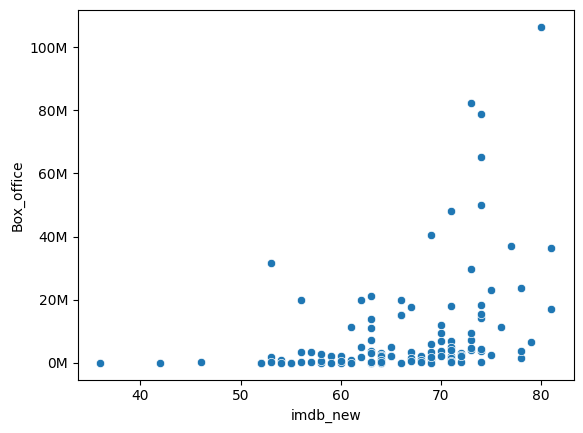

In [90]:
# does imdb rating affect box office revenue?
ax = sns.scatterplot(x='imdb_new', y='Box_office', data=A24data)

def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

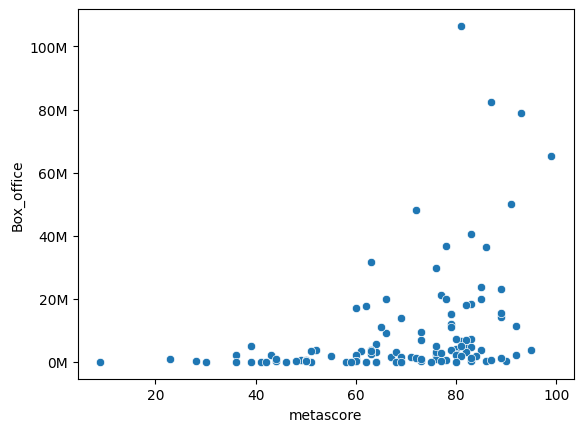

In [91]:
# does metascore rating affect box office revenue?
ax = sns.scatterplot(x='metascore', y='Box_office', data=A24data)

def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

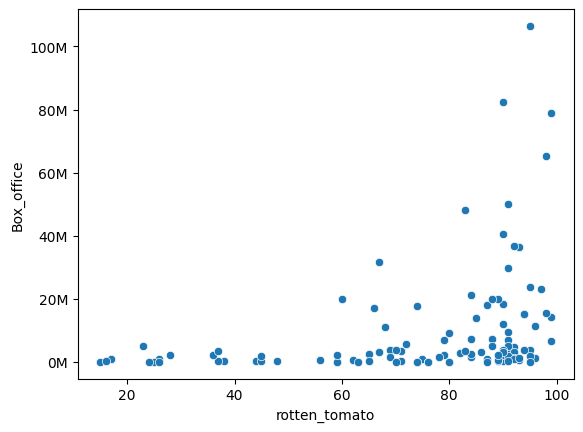

In [92]:
# does rotten tomato rating affect box office revenue?
ax = sns.scatterplot(x='rotten_tomato', y='Box_office', data=A24data)

def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

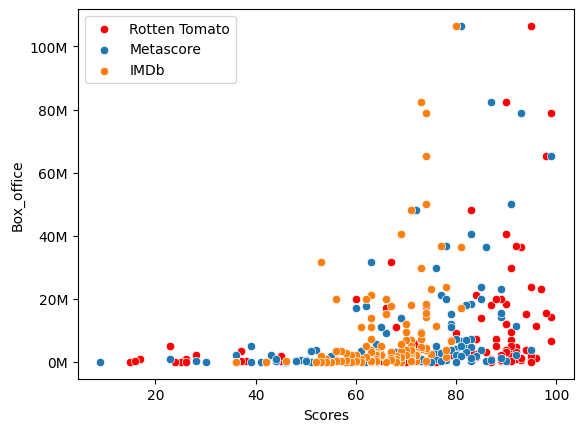

In [99]:
# Create a single figure and subplot
fig, ax = plt.subplots()

# Scatter plot 1
sns.scatterplot(x='rotten_tomato', y='Box_office', data=A24data, ax=ax, label='Rotten Tomato', color='red')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Scatter plot 2
sns.scatterplot(x='metascore', y='Box_office', data=A24data, ax=ax, label='Metascore')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Scatter plot 3
sns.scatterplot(x='imdb_new', y='Box_office', data=A24data, ax=ax, label='IMDb')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

#change x axis label
ax.set_xlabel('Scores')

# Add legend
plt.legend()

# Display the plot
plt.show()